In [13]:
from qiskit import QuantumCircuit,transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import numpy as np

In [14]:
simulator='ibmq_qasm_simulator'

In [15]:
c=2 #counting bit
n=1 #eigen vector
theta=0.9

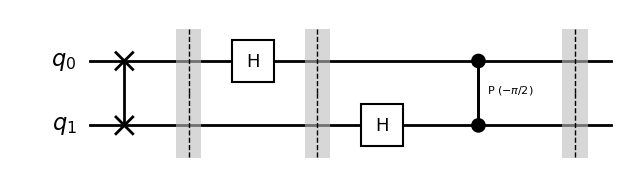

In [16]:
iqft=QuantumCircuit(c,name='iqft')

for i in range(c//2):
    iqft.swap(i,c-i-1)
iqft.barrier()

for i in range(c):
    iqft.h(i)
    for j in range(i):
        iqft.cp(-np.pi/(2**(i-j)),j,i)
    iqft.barrier()
        
iqft.draw(output='mpl',style='bw')

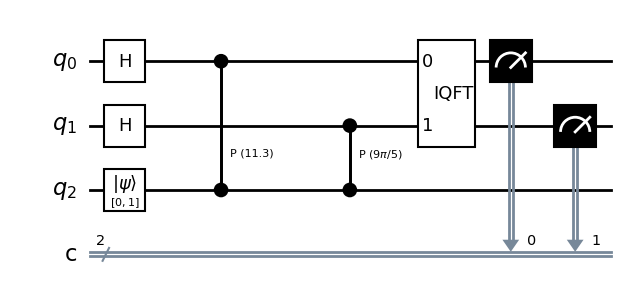

In [20]:
qc=QuantumCircuit(c+n,c)

qc.h(range(c))
for i in range(c,c+n):
    qc.initialize([0,1],i)
for i in range(0,c):
    qc.cp(2*np.pi*theta*(2**(c-i-1)),i,c)
# qc.append(iqft,range(c))
qc.append(QFT(c,inverse=True),range(c))
qc.measure(range(c),range(c))

qc.draw(output='mpl',style='bw')

In [21]:
def execute(qc,simulator):
    provider=QiskitRuntimeService()
    backend=provider.get_backend(simulator)
    job=backend.run(transpile(qc,backend),shots=1024)
    result=job.result()
    return result.get_counts()

In [22]:
plot_histogram(execute(qc,simulator))

TranspilerError: "HighLevelSynthesis was unable to synthesize Instruction(name='reset', num_qubits=1, num_clbits=0, params=[])."